## Paper Figures

In [1]:
#Imports
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import seaborn as sns
import rdkit, rdkit.Chem, rdkit.Chem.Draw

#use plotting style specified on Box
plt.style.use('presentation.mplstyle')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['mathtext.fontset'] = 'stixsans'
sns.set_palette('Set2')

### Sigma profile for 1-ethyl-3-methylimidazolium tetrafluoroborate

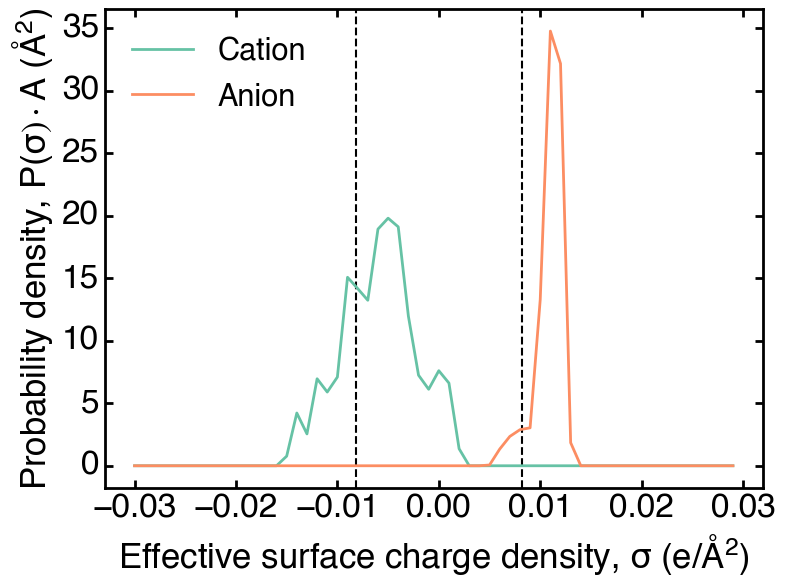

In [38]:
#create sigma profile plot for 1-ethyl-3-methylimidazolium tetrafluoroborate
anion_sigma_profile_filename='1-ethyl-3-methylimidazolium_tetrafluoroborate_anion_sigmas_and_areas.csv'
anion_sigma_profile_df = pd.read_csv(anion_sigma_profile_filename)
cation_sigma_profile_filename='1-ethyl-3-methylimidazolium_tetrafluoroborate_cation_sigmas_and_areas.csv'
cation_sigma_profile_df = pd.read_csv(cation_sigma_profile_filename)
plt.figure(figsize = (8,6))
plt.axvline(-0.0082, color = 'black', linestyle = '--', linewidth=1.5)
plt.axvline(0.0082, color = 'black', linestyle = '--', linewidth = 1.5)
ymin = np.min([cation_sigma_profile_df['areas'], anion_sigma_profile_df['areas']])
ymax = np.max([cation_sigma_profile_df['areas'], anion_sigma_profile_df['areas']])
xmin = np.min([cation_sigma_profile_df['sigmas'], anion_sigma_profile_df['sigmas']])
xmax = np.max([cation_sigma_profile_df['sigmas'], anion_sigma_profile_df['sigmas']])

#uncomment lines below to shade positive polarity, nonpolarizable, and negative polarity regions
#plt.axvspan(xmin - 1,  -0.0082, color = 'lightblue', alpha = 0.2)
#plt.axvspan(-0.0082, 0.0082, color = 'lightgrey', alpha = 0.2)
#plt.axvspan(0.0082, xmax + 1, color = 'lightcoral', alpha = 0.1)

plt.plot(cation_sigma_profile_df['sigmas'], cation_sigma_profile_df['areas'], label = 'Cation')
plt.plot(anion_sigma_profile_df['sigmas'], anion_sigma_profile_df['areas'], label = 'Anion')
plt.tick_params(labelsize=24)
plt.xlabel('Effective surface charge density, $\mathregular{\sigma}$ (e/Å$^\mathregular{2}$)', fontsize = 25)
plt.ylabel('Probability density, P($\mathregular{\sigma}) \cdot \mathregular{A}$ (Å$^\mathregular{2}$)', fontsize = 25)
plt.legend(fontsize=22)
plt.locator_params(nbins = 10)
plt.tight_layout(pad=1)
plt.savefig('1-ethyl-3-methylimidazolium_tetrafluoroborate_sigma_profile.pdf', dpi = 600)
plt.show()

#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvspan.html


In [35]:
#draw cation & anion structures using rdkit & smiles strings
cation_smiles = 'CC[n+]1ccn(C)c1'
anion_smiles = 'F[B-](F)(F)F'

cation_mol = rdkit.Chem.MolFromSmiles(cation_smiles)
anion_mol = rdkit.Chem.MolFromSmiles(anion_smiles)
d2d = rdkit.Chem.Draw.MolDraw2DCairo(600,600)
d2d.SetLineWidth(5)
d2d.SetFontSize(40)
dopts = d2d.drawOptions()
dopts.useBWAtomPalette()
d2d.DrawMolecule(cation_mol)
d2d.WriteDrawingText('1-ethyl-3-methylimidazolium.png')
d2d.FinishDrawing()

d2d = rdkit.Chem.Draw.MolDraw2DCairo(600,600)
d2d.SetLineWidth(5)
d2d.SetFontSize(40)
dopts = d2d.drawOptions()
dopts.useBWAtomPalette()
d2d.DrawMolecule(anion_mol)
d2d.WriteDrawingText('tetrafluoroborate.png')
d2d.FinishDrawing()

#https://greglandrum.github.io/rdkit-blog/posts/2023-05-26-drawing-options-explained.html

### ML Model Performance - Cross Validation


In [4]:
#define order of features in bar plot
input_features_condensed_order = [r'S$_i$', r'M$_i$, WAPS & WANS', 'sigma profiles', 'RDKit']
input_features_condensed_order.reverse()

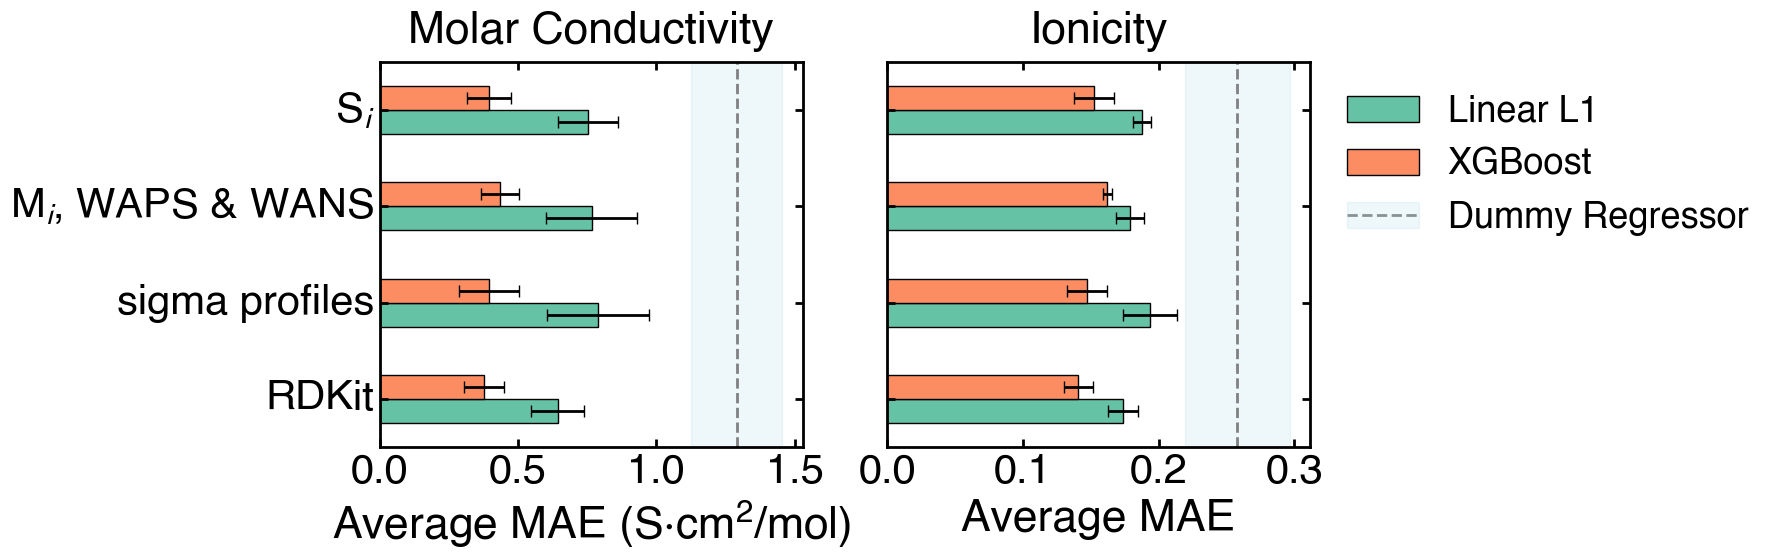

In [46]:
#Create molar conductivity and ionicity CV model performance plot w/S_i, sigma profiles, & RDKit input descriptors 
conductivity_results_condensed_avg_MAE = pd.read_csv('MolarConductivityPrediction_CV_AvgMAE.csv')
conductivity_results_condensed_stdev_MAE = pd.read_csv('MolarConductivityPrediction_CV_StDevMAE.csv')
conductivity_dummy_regressor_data = pd.read_csv('MolarConductivityPrediction_CV_DummyRegressor.csv')

conductivity_results_condensed_avg_MAE = conductivity_results_condensed_avg_MAE.set_index('input_features')
conductivity_results_condensed_avg_MAE = conductivity_results_condensed_avg_MAE.reindex(input_features_condensed_order)
conductivity_results_condensed_stdev_MAE = conductivity_results_condensed_stdev_MAE.set_index('input_features')
conductivity_results_condensed_stdev_MAE = conductivity_results_condensed_stdev_MAE.reindex(input_features_condensed_order)

conductivity_dummy_regressor_avg_mae = conductivity_dummy_regressor_data['Avg MAE'].values[0]
conductivity_dummy_regressor_stdv_mae = conductivity_dummy_regressor_data['StDev MAE'].values[0]

ionicity_results_condensed_avg_MAE = pd.read_csv('IonicityPrediction_CV_AvgMAE.csv')
ionicity_results_condensed_stdev_MAE = pd.read_csv('IonicityPrediction_CV_StDevMAE.csv')
ionicity_dummy_regressor_data = pd.read_csv('IonicityPrediction_CV_DummyRegressor.csv')

ionicity_results_condensed_avg_MAE = ionicity_results_condensed_avg_MAE.set_index('input_features')
ionicity_results_condensed_avg_MAE = ionicity_results_condensed_avg_MAE.reindex(input_features_condensed_order)
ionicity_results_condensed_stdev_MAE = ionicity_results_condensed_stdev_MAE.set_index('input_features')
ionicity_results_condensed_stdev_MAE = ionicity_results_condensed_stdev_MAE.reindex(input_features_condensed_order)

ionicity_dummy_regressor_avg_mae = ionicity_dummy_regressor_data['Avg MAE'].values[0]
ionicity_dummy_regressor_stdv_mae = ionicity_dummy_regressor_data['StDev MAE'].values[0]


fig, axs = plt.subplots(1,2, figsize = (12,5), sharey=True)
conductivity_dummy_regressor_line = axs[0].axvline(conductivity_dummy_regressor_avg_mae, color = 'grey', linestyle = '--')
conductivity_results_condensed_avg_MAE.plot.barh(xerr = conductivity_results_condensed_stdev_MAE, ax = axs[0], capsize = 4, edgecolor='black')

ymin, ymax = axs[0].get_ylim()
conductivity_dummy_regressor_error_band = axs[0].fill_betweenx(y = np.arange(ymin,ymax + 1), x1 = conductivity_dummy_regressor_avg_mae - conductivity_dummy_regressor_stdv_mae, x2 = conductivity_dummy_regressor_avg_mae + conductivity_dummy_regressor_stdv_mae, color = 'lightblue',alpha = 0.2)
axs[0].set_xlabel(r'Average MAE (S$\cdot$cm$\mathregular{^2}$/mol)', size = 32)
axs[0].set_ylabel('')
axs[0].set_title('Molar Conductivity', size = 32, pad = 14)

ionicity_dummy_regressor_line = axs[1].axvline(ionicity_dummy_regressor_avg_mae, color = 'grey', linestyle = '--')
ionicity_results_condensed_avg_MAE.plot.barh(xerr = ionicity_results_condensed_stdev_MAE, ax = axs[1], capsize = 4, edgecolor = 'black')
ionicity_linesAndLabels_barplot =  [axs[1].get_legend_handles_labels()]
ionicity_lines_all, ionicity_labels_all = [sum(x, []) for x in zip(*ionicity_linesAndLabels_barplot)]
ymin, ymax = axs[1].get_ylim()
ionicity_dummy_regressor_error_band = plt.fill_betweenx(y = np.arange(ymin,ymax + 1), x1 = ionicity_dummy_regressor_avg_mae - ionicity_dummy_regressor_stdv_mae, x2 = ionicity_dummy_regressor_avg_mae + ionicity_dummy_regressor_stdv_mae, color = 'lightblue',alpha = 0.2)
ionicity_lines_all.extend([(ionicity_dummy_regressor_line,ionicity_dummy_regressor_error_band)])
ionicity_labels_all.extend(['Dummy Regressor'])


axs[1].set_xlabel(r'Average MAE', size=32)
axs[1].set_title('Ionicity', size = 32, pad = 14)

axs[1].legend(handles = ionicity_lines_all, labels = ionicity_labels_all,bbox_to_anchor = (1.01,1), fontsize = 26)
axs[0].get_legend().remove()

for ax in axs:
    ax.tick_params('both', labelsize = 30)
    ax.locator_params(nbins = 5)
plt.savefig('MolarConductivity_Ionicity_CV_MAE_ModelPerformance_Condensed.pdf', bbox_inches='tight', dpi = 600)
plt.show()

#https://stackoverflow.com/questions/40736920/line-plus-shaded-region-for-error-band-in-matplotlibs-legend
#https://matplotlib.org/stable/api/ticker_api.html#matplotlib.ticker.MaxNLocator
#https://matplotlib.org/stable/users/explain/text/mathtext.html

### Cation $S_5$, Cation Longest Alkyl Chain Length - All ILs

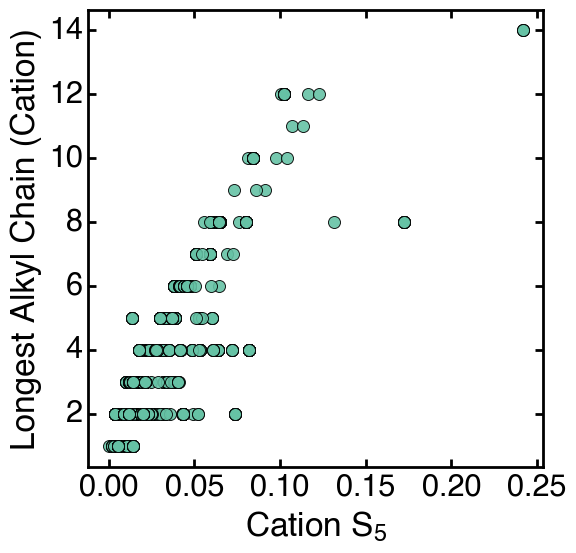

In [6]:
#Cation S5 vs alkyl chain length
cation_S5_alkyl_chain_df = pd.read_csv('CationS5_LongestAlkylChain_entireDataset.csv')
full_data_cation_S5 = cation_S5_alkyl_chain_df['Cation S_5']
full_data_longest_alkyl_chain = cation_S5_alkyl_chain_df['Longest Alkyl Chain (Cation)']

fig, axs = plt.subplots(figsize=(6,6))
sns.scatterplot(x=full_data_cation_S5, y=full_data_longest_alkyl_chain, s = 75, edgecolor = 'black', alpha = 0.9)
axs.yaxis.set_major_locator(ticker.MaxNLocator(integer = True))
axs.yaxis.set_minor_locator(ticker.MaxNLocator(integer = True))
plt.xlabel(r'Cation S$\mathregular{_5}$', fontsize=24)
plt.ylabel('Longest Alkyl Chain (Cation)', fontsize = 24)
plt.tick_params(labelsize = 22)
fig.tight_layout(pad = 2)
plt.locator_params(nbins = 10)
plt.savefig('longest_alkyl_chain_vs_cation_S5.pdf', dpi = 600)
plt.show()


### Cation $S_5$, Anion $S_7$ & Ionicity - Ammonium Cation Family

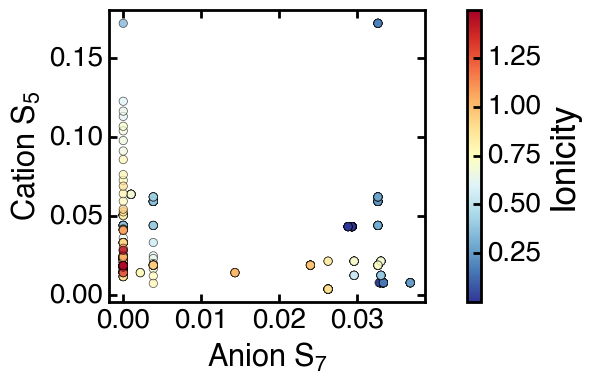

In [7]:
#Create plot of cation_S5 vs anion_S7, colored by ionicity for ammonium cation family
cationS5_anionS7_ionicity_ammoniumILs_df = pd.read_csv('CationS5_AnionS7_Ionicity_ammoniumILs.csv')
ammonium_cation_family_cation_S5 = cationS5_anionS7_ionicity_ammoniumILs_df['Cation S_5 (Ammonium Cation Family)']
ammonium_cation_family_anion_S7 = cationS5_anionS7_ionicity_ammoniumILs_df['Anion S_7 (Ammonium Cation Family)']
ammonium_cation_family_ionicity = cationS5_anionS7_ionicity_ammoniumILs_df['Ionicity (Ammonium Cation Family)']

indices_sorted_by_ionicity = np.argsort(ammonium_cation_family_ionicity)


fig, axs = plt.subplots(figsize = (6,4))
sns.scatterplot(y = ammonium_cation_family_cation_S5[indices_sorted_by_ionicity], x = ammonium_cation_family_anion_S7[indices_sorted_by_ionicity], hue=ammonium_cation_family_ionicity[indices_sorted_by_ionicity], palette = 'RdYlBu_r', edgecolor = 'black', ax = axs, alpha = 0.7)
norm = plt.Normalize(np.min(ammonium_cation_family_ionicity), np.max(ammonium_cation_family_ionicity))
sm = plt.cm.ScalarMappable(cmap='RdYlBu_r', norm = norm)
sm.set_array([])
axs.get_legend().remove()
colorbar_tick_locator = ticker.MaxNLocator(nbins=6)
cbar = axs.figure.colorbar(sm, ax=axs, label = 'Ionicity', ticks = colorbar_tick_locator, pad = 0.1)
cbar.ax.tick_params(labelsize = 20)
plt.locator_params(nbins=5)
plt.xlabel(r'Anion S$\mathregular{_7}$', size = 22)
plt.ylabel(r'Cation S$\mathregular{_5}$', size = 22)
plt.xticks(size=20)
plt.yticks(size = 20)
fig.tight_layout()
plt.savefig('cation_S5_vs_anion_S7_ionicity_ammonium_cation_family.pdf', dpi = 600)
plt.show()


#https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.colorbar.html#matplotlib.figure.Figure.colorbar
#https://stackoverflow.com/questions/22012096/how-to-set-number-of-ticks-in-plt-colorbar

### Ionicity Predictions $\times$ NE Estimated Conductivity vs Molar Conductivity Predictions - Linear L1 Model, S_i input features

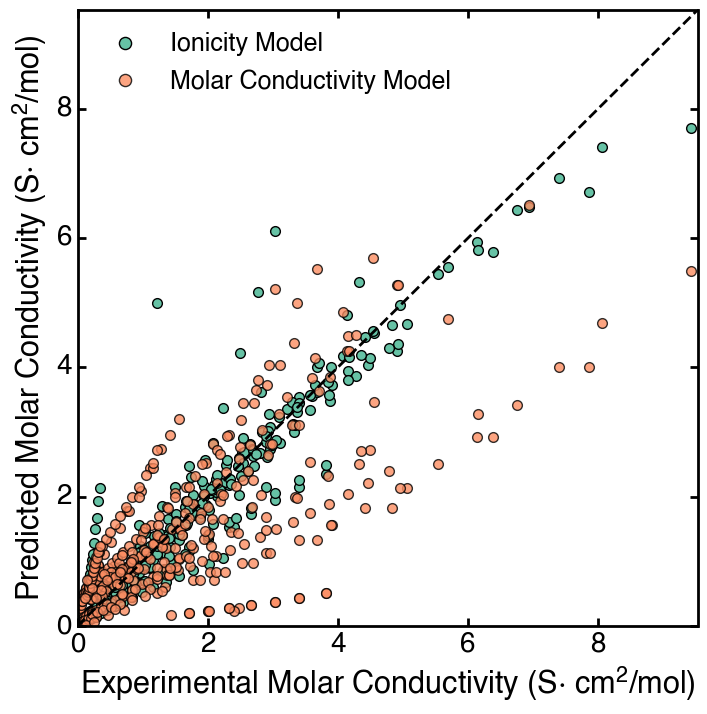

In [8]:
#plot yhat vs y & estimate yhat using molar conductivity and ionicity predictions for Linear L1 model, S_i input features
l1_conductivity_test_set_df = pd.read_csv('MolarConductivityPredictions_TestSet_LinearL1_InputFeatures_S_i.csv')
l1_test_predicted_conductivity_from_ionicity = pd.read_csv('MolarConductivityEstimates_fromIonicityPredictionsAndNE_TestSet_LinearL1_InputFeatures_S_i.csv')

plt.figure(figsize = (8,8))
max_conductivity = np.max([l1_conductivity_test_set_df['y'], l1_test_predicted_conductivity_from_ionicity['yhat'], l1_conductivity_test_set_df['yhat']])
plt.plot(l1_conductivity_test_set_df['y'],l1_test_predicted_conductivity_from_ionicity['yhat'], 'o', markeredgecolor = 'black', markersize = 7, label = f'Ionicity Model')
plt.plot(l1_conductivity_test_set_df['y'],l1_conductivity_test_set_df['yhat'], 'o', markeredgecolor = 'black', markersize = 7, alpha = 0.8, label = f'Molar Conductivity Model')
plt.xlim(0,max_conductivity + 0.1)
plt.ylim(0,max_conductivity + 0.1)
plt.plot([0,max_conductivity + 0.1], [0,max_conductivity + 0.1], '--',color = 'black')
plt.xlabel(r'Experimental Molar Conductivity (S$\cdot$ cm$\mathregular{^2}$/mol)', fontsize = 22)
plt.ylabel(r'Predicted Molar Conductivity (S$\cdot$ cm$\mathregular{^2}$/mol)', fontsize = 22)
plt.xticks(size = 20)
plt.yticks(size=20)
plt.legend(markerscale = 1.25, fontsize = 18)
plt.savefig(f'Comparison_IonicityConductivityModels_TestSet_S_i.pdf', dpi = 600)
plt.show()
